In [8]:
#Code to read the two datasets
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)

players_data <- read_csv("https://raw.githubusercontent.com/ellakiciman/dsci100_project_individual/refs/heads/main/players.csv")
sessions_data <- read_csv("https://raw.githubusercontent.com/ellakiciman/dsci100_project_individual/refs/heads/main/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# 1) Data Description

In [10]:
#Code for summary statistics
players_summary <- players_data |>
    select(played_hours, Age) |>
    summary()
players_summary

name_counts <- players_data |>
    group_by(name) |>
    summarize(count = n())
name_counts

hashedEmail_counts <- sessions_data |>
    group_by(hashedEmail) |>
    summarize(count = n()) |>
    arrange(desc(count))
hashedEmail_counts

times_NA <- sessions_data |>
    filter(is.na(original_end_time))
times_NA

original_times_summary <- sessions_data |>
    select(original_start_time, original_end_time) |>
    summary()
original_times_summary

  played_hours          Age       
 Min.   :  0.000   Min.   : 9.00  
 1st Qu.:  0.000   1st Qu.:17.00  
 Median :  0.100   Median :19.00  
 Mean   :  5.846   Mean   :21.14  
 3rd Qu.:  0.600   3rd Qu.:22.75  
 Max.   :223.100   Max.   :58.00  
                   NA's   :2      

name,count
<chr>,<int>
Aarav,1
Aaron,1
Adrian,1
⋮,⋮
Zelda,1
Ziad,1
Zoe,1


hashedEmail,count
<chr>,<int>
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,219
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,159
⋮,⋮
fcab03c6d3079521e7f9665caed0f31fe3dae6b5ccb86e6cb58747a43aa8789f,1
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
55d24216db39c27e1f17cc43d3127cbf8ed76ada6d098202b53ded319855e2c1,27/08/2024 17:06,NA,1.72478e+12,NA
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,15/09/2024 04:21,NA,1.72637e+12,NA


 original_start_time original_end_time  
 Min.   :1.712e+12   Min.   :1.712e+12  
 1st Qu.:1.716e+12   1st Qu.:1.716e+12  
 Median :1.719e+12   Median :1.719e+12  
 Mean   :1.719e+12   Mean   :1.719e+12  
 3rd Qu.:1.722e+12   3rd Qu.:1.722e+12  
 Max.   :1.727e+12   Max.   :1.727e+12  
                     NA's   :2          

**Information about players data:**
- 7 variables
- 196 observations (individual players)
- Both data sets collected by recording information from users of the Plaicraft Minecraft Server, set up by the PLAI research group


|   Variable   | Data type |   Min/Mean/Max   |                         Description                         |                         Things to Note                         |
|:------------:|:---------:|:----------------:|:-----------------------------------------------------------:|:--------------------------------------------------------------:|
| experience   | character |                  | Player skill level                                          |                                                                |
| subscribe    | logical   |                  | Newsletter subscription status                              |                                                                |
| hashedEmail  | character |                  | Hashed version of a player's email (links to sessions data) |                                                                |
| played_hours | double    | 0/5.85/223.1 hrs | Time played on server                                       | Majority of observations are 0 hours, might impact predictions |
| name         | character |                  | First name of each player                                   | No repeated names                                              |
| gender       | character |                  | Gender of each player                                       |                                                                |
| Age          | double    | 9/21.14/58 years | Age of each player                                          |                                                                |

**Information about sessions data:**
- 7 variables after wrangling (5 originally)
- 1535 observations (sessions)

|       Variable      | Data Type |              Min/Mean/Max              |                         Description                        |                                 Things to Note                                 |
|:-------------------:|:---------:|:--------------------------------------:|:----------------------------------------------------------:|:------------------------------------------------------------------------------:|
| hashedEmail         | character |                                        | Hashed version of a player's email (links to players data) | Only 125 unique values                        |
| start_date          | character |                                        | Date session began (dd/mm/yy)                              |                                                                                |
| start_time          | character |                                        | Time session began (hr:min)                                | Would need to change data type and wrangle to be able to compare with end_time |
| end_date            | character |                                        | Date session ended (dd/mm/yy)                              |                                                                                |
| end_time            | character |                                        | Time session ended (hr:min)                                | 2 NAs recorded                                                           |
| original_start_time | double    | $1.71*10^{12}$/$1.72*10^{12}$/$1.73*10^{12}$ | Session start time in UNIX time (ms)                       |                                                                                |
| original_end_time   | double    |  $1.71*10^{12}$/$1.72*10^{12}$/$1.73*10^{12}$ | Session end time in UNIX time (ms)                              | 2 NAs recorded                        

# 2) Questions

**Broad question:** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific question:** Can age and time played on the server predict the subscription status of a player?

I can use the data to create a classification model that predicts subscription status based on age and time played. Based on the accuracy of the model, you can get a sense of how well these variables predict subscription status. The predictors should be centered and scaled, but no other data wrangling is needed.

# 3) Exploratory Data Analysis and Visualization

In [11]:
#tidying sessions_data by separating date and time for start_time and end_time
#Otherwise datasets are tidy (each observation is one row, each column is one variable, and each cell is one value)
sessions_tidy <- sessions_data |>
    separate(col = start_time, into = c("start_date", "start_time"), sep = " ") |>
    separate(col = end_time, into = c("end_date", "end_time"), sep = " ")

In [4]:
#Showing that datasets can be loaded in R
head(players_data)
head(sessions_tidy)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_date,start_time,end_date,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,30/06/2024,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,17/06/2024,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,25/07/2024,17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,03:22,25/07/2024,03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16:01,25/05/2024,16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024,15:08,23/06/2024,17:10,1.71916e+12,1.71916e+12


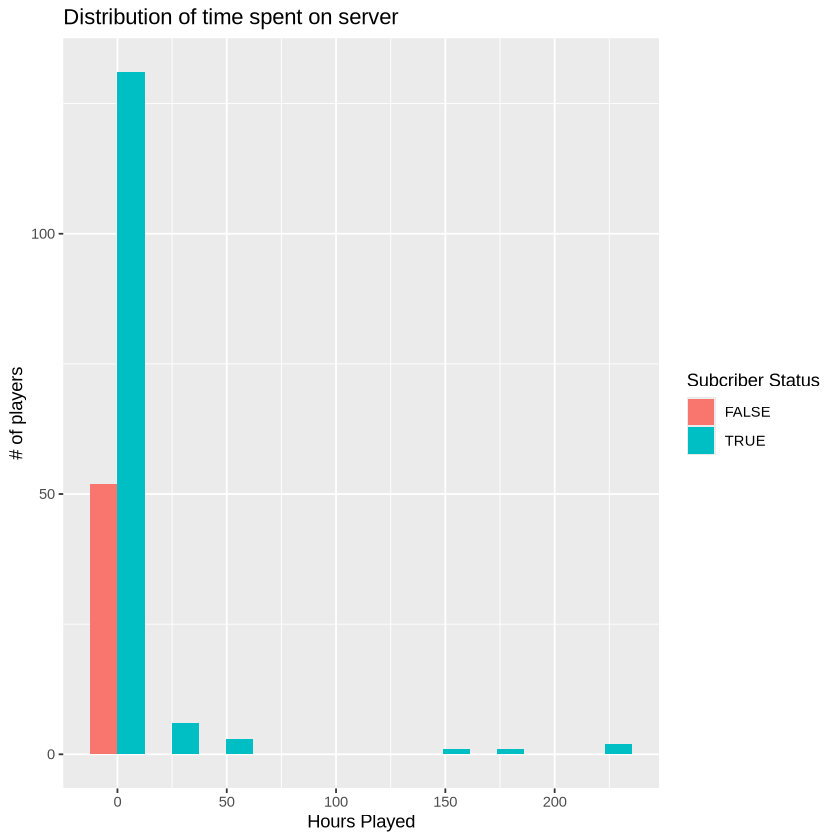

In [5]:
time_played_plot <- players_data |>
    ggplot(aes(x = played_hours, fill = subscribe)) +
    geom_histogram(position = "dodge", bins = 10) +
    labs(x = "Hours Played", y = "# of players",
         fill = "Subcriber Status",
         title = "Distribution of time spent on server")
time_played_plot

**Graph 1:** The majority of players have logged 0.0 hours of play time. Anyone who has not subscribed to the newsletter has played for 0.0 hours, which might be useful in predicting subscription status. 

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


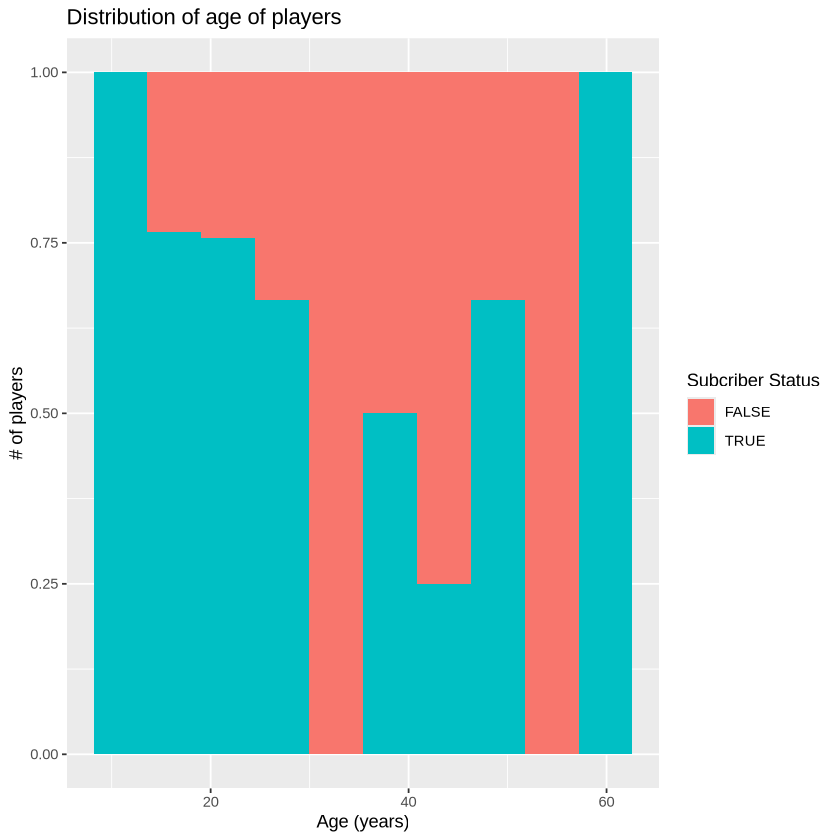

In [6]:
age_plot <- players_data |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_histogram(position = "fill", bins = 10) +
    labs(x = "Age (years)", y = "# of players",
         fill = "Subcriber Status",
         title = "Distribution of age of players")
age_plot

**Graph 2:** There is not a particular pattern to which age groups have a higher proportion of subscribed vs unsubscribed players. There are some age ranges where there are more subscribed players, but given a sample size of 196 players, it is unclear if these results would scale.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


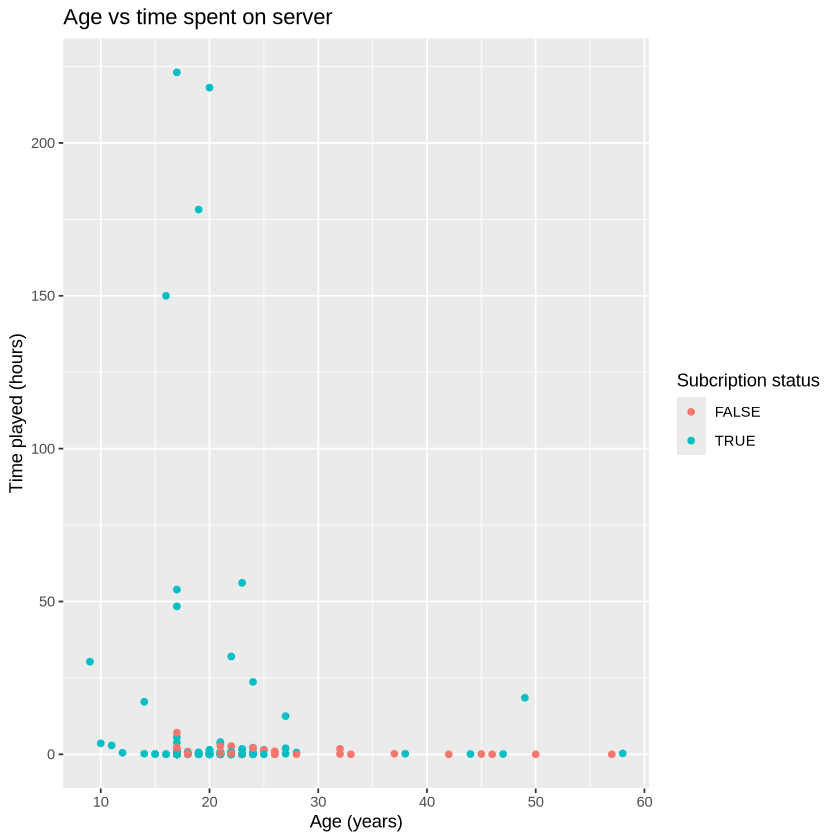

In [7]:
subscribe_plot <- players_data |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
        geom_point() +
        labs(x = "Age (years)", y = "Time played (hours)", 
             color = "Subcription status",
             title = "Age vs time spent on server")
subscribe_plot

**Graph 3:** This visualization shows us how a k-nn classification model might function using these predictors. There is a lot of the data clustered near the bottom of the graph. Additionally, there is a large portion of the plot where there are no data points, so predicting a class label in this area might not lead to very accurate results.

# 4) Methods and Plan

To address my questions, I would use a k-nn classification model that predicts subscription status based on age and time played. This is classification rather than regression because it involves predicting a class label. While k-nn classification makes very few assumptions about the data, the two predictor variables should be centered and scaled. The unscaled variables have two very different ranges, and so the model would weigh time played more than age. One limitation is that it might not do a good job predicting values that have very different ranges than the predictor variables. 

The predictor variables will be centered and scaled during the model creation process. To test overall accuracy, I would split the data into training and testing sets at the beginning, using around 70% of the data for training. The training data would then be further split to do a 5-fold cross validation when picking the k value with the highest accuracy for the final model. Since we have a label that is more important to us (subscribe = TRUE), it is also important to look at the precision and recall.